In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [55]:
# load pre survey data for 2021 
post_df = pd.read_csv("../data/processed/post_survey.csv", sep=",", encoding='cp1252')

In [3]:
post_df

,ID,Start time,Completion time,Email,Name,workshop_interest,workshop_LOU,workshop_relevance,workshop_org,prac_q,...,facilitator_q_a,facilitator_experience,facilitator_subject_knowledge,attention,content_pace,facilitator_Comments,slack_recommendations,subscription,general_comments,PD_preferred_time
0,1,4-28-22 11:02:00,4-28-22 11:04:46,anonymous,NaN,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Just right,NaN,It was fine / good,"Yes, I will subscribe via PMV's website to rec...",Thank you and it was a pleasure knowing you al...,Weekdays (Monday to Friday)\n
1,2,4-28-22 11:01:44,4-28-22 11:05:26,anonymous,NaN,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Just right,Awesome!,I honestly did use Slack I used the chat and t...,"Maybe, I will think about it;",NaN,Weekdays (Monday to Friday)\n
2,3,4-28-22 11:01:41,4-28-22 11:07:05,anonymous,NaN,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Just right,nothing :),I didn't use slack a lot because our organizat...,"Maybe, I will think about it;Yes, I will subsc...",NaN,Weekdays (Monday to Friday)\n
3,4,4-28-22 11:01:46,4-28-22 11:07:08,anonymous,NaN,Agree,Agree,Agree,Neutral,Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Just right,can't think of anything right now,I didn't have time to explore slack,"No, not at this time;",thanks again!,Weekdays (Monday to Friday)\n
4,5,4-28-22 11:02:10,4-28-22 11:10:02,anonymous,NaN,Strongly agree,Agree,Agree,Strongly agree,Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Just right,I enjoyed the sense of camaraderie that was cr...,I did not like and have never used SLACK plus ...,"Maybe, I will think about it;",I enjoyed the sense of camaraderie that was cr...,Weekdays (Monday to Friday)\n
5,6,4-28-22 11:02:22,4-28-22 11:10:11,anonymous,NaN,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Just right,Everyone is well trained,Any tool like Miro would be more useful,"Yes, I will subscribe via PMV's website to rec...",Yes I give my consent,Weekdays (Monday to Friday)\n
6,7,4-28-22 11:01:41,4-28-22 11:10:35,anonymous,NaN,Agree,Strongly agree,Strongly agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Just right,"Nice, open and very easy going!",formulating small groups on the different head...,"Yes, I will subscribe via PMV's website to rec...",NaN,Tues/ Wed or Thurs
7,8,4-28-22 11:01:45,4-28-22 11:10:51,anonymous,NaN,Agree,Strongly agree,Agree,Strongly agree,Neutral,...,Agree,Agree,Agree,Agree,Just right,NaN,NaN,"Maybe, I will think about it;",NaN,Weekdays (Monday to Friday)\n
8,9,4-28-22 11:02:44,4-28-22 11:12:09,anonymous,NaN,Strongly agree,Strongly agree,Agree,Strongly agree,Neutral,...,Strongly Agree,Agree,Strongly Agree,Agree,Just right,Nil,Nil,"No, I am already subscribed and receiving mess...",NaN,Option for BOTH weekdays and weekends
9,10,4-28-22 11:02:25,4-28-22 11:13:04,anonymous,NaN,Agree,Strongly agree,Strongly agree,Strongly agree,Agree,...,Agree,Strongly Agree,Strongly Agree,Agree,Just right,Facilitators were very knowledgeable and great...,NaN,"No, not at this time;",NaN,Weekdays (Monday to Friday)\n


In [4]:
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             13 non-null     int64  
 1   Start time                     13 non-null     object 
 2   Completion time                13 non-null     object 
 3   Email                          13 non-null     object 
 4   Name                           0 non-null      float64
 5   workshop_interest              13 non-null     object 
 6   workshop_LOU                   13 non-null     object 
 7   workshop_relevance             13 non-null     object 
 8   workshop_org                   13 non-null     object 
 9   prac_q                         13 non-null     object 
 10  future_relevance               13 non-null     object 
 11  content_volume                 13 non-null     object 
 12  improvements_content           12 non-null     objec

### Question 1: The Workshop content sustained my interest

In [5]:
post_df.workshop_interest.unique()

array(['Agree', 'Strongly agree', 'Neutral'], dtype=object)

In [6]:
bar = alt.Chart(post_df, title="Workshop content interest of participants, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['workshop_interest']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('workshop_interest', sort='x', title="")
    ).properties(
    width=400,
    height=150
    )

text = alt.Chart(post_df, title="Workshop content interest of participants, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['workshop_interest']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('workshop_interest', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=150
    )

q1_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q1_plot


alt.LayerChart(...)

### Question 2: The Workshop content was easy to understand

In [7]:
post_df.workshop_LOU.unique()

array(['Agree', 'Strongly agree', 'Neutral'], dtype=object)

In [8]:
bar = alt.Chart(post_df, title="Ease of understanding of workshop content, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['workshop_LOU']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('workshop_LOU', sort='x', title="")
    ).properties(
    width=400,
    height=150
    )

text = alt.Chart(post_df, title="Ease of understanding of workshop content, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['workshop_LOU']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('workshop_LOU', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=150
    )

q2_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q2_plot

alt.LayerChart(...)

### Question 3: The Workshop content was relevant to my current job

In [9]:
post_df.workshop_relevance.unique()

array(['Agree', 'Strongly agree'], dtype=object)

In [10]:
bar = alt.Chart(post_df, title="Workshop content relevance to current job, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['workshop_relevance']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('workshop_relevance', sort='x', title="")
    ).properties(
    width=400,
    height=100
    )

text = alt.Chart(post_df, title="Workshop content relevance to current job, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['workshop_relevance']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('workshop_relevance', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=100
    )

q3_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q3_plot

alt.LayerChart(...)

### Question 4: The Workshop content was relevant to my Organization

In [11]:
post_df.workshop_org.unique()

array(['Agree', 'Strongly agree', 'Neutral'], dtype=object)

In [12]:

bar = alt.Chart(post_df, title="Workshop content relevance to participant organization, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['workshop_org']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('workshop_org', sort='x', title="")
    ).properties(
    width=400,
    height=150
    )

text = alt.Chart(post_df, title="Workshop content relevance to participant organization, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['workshop_org']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('workshop_org', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=150
    )

q4_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q4_plot

alt.LayerChart(...)

### Question 5: The optional practice exercises helped me understand the Workshop content

In [13]:
post_df.prac_q.unique()

array(['Agree', 'Strongly agree', 'Neutral'], dtype=object)

In [14]:

bar = alt.Chart(post_df, title="Optional practice exercises helps participants understand workshop content, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['prac_q']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('prac_q', sort='x', title="")
    ).properties(
    width=400,
    height=150
    )

text = alt.Chart(post_df, title="Optional practice exercises helps participants understand workshop content, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['prac_q']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('prac_q', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=150
    )

q5_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q5_plot

alt.LayerChart(...)

### Question 6: I will be able to apply the knowledge from these Workshop sessions in the future

In [15]:
post_df.future_relevance.unique()

array(['Agree', 'Strongly agree', 'Neutral'], dtype=object)

In [16]:
bar = alt.Chart(post_df, title="Appliation of workshop content knowledge, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['future_relevance']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('future_relevance', sort='x', title="")
    ).properties(
    width=400,
    height=150
    )

text = alt.Chart(post_df, title="Appliation of workshop content knowledge, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['future_relevance']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('future_relevance', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=150
    )

q6_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q6_plot

alt.LayerChart(...)

### Question 7: How would you rate the volume of information presented in this one-hour session?

In [17]:
post_df.content_volume.unique()

array(['Just right', 'Too little information'], dtype=object)

In [18]:
bar = alt.Chart(post_df, title="Participant rating of workshop content volume, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['content_volume']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('content_volume', sort='x', title="")
    ).properties(
    width=400,
    height=100
    )

text = alt.Chart(post_df, title="Participant rating of workshop content volume, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['content_volume']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('content_volume', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=100
    )

q7_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q7_plot

alt.LayerChart(...)

### Question 11: What HOURS do you recommend for future training sessions?  Please include hours that you personally prefer in the "other" box below.

In [19]:
post_df.training_hours.unique()

array(['Morning\n', 'Afternoon', 'morning or afternoon are good ',
       'Evening', '12 noon - 1PM'], dtype=object)

In [20]:
import re
def preprocess(text):
    # Replace a sequence of whitespaces by a single whitespace
    text = re.sub(r"\s+", " ", text)
    
    # Remove other strange characters
    text = re.sub(r"""[\n\r]+""", "", text)
    
    # Remove other strange characters
    text = re.sub(r"""[\*\~]+""", "", text)

    # Replace slashes with spaces
    text = re.sub(r"""[\/]+""", " ", text)

    return text

In [21]:
post_df["training_hours"] = post_df["training_hours"].apply(preprocess)

In [22]:
post_df.training_hours.unique()

array(['Morning ', 'Afternoon', 'morning or afternoon are good ',
       'Evening', '12 noon - 1PM'], dtype=object)

In [23]:
post_df = post_df.replace(to_replace ="morning or afternoon are good ",
                 value ="Morning/Afternoon")

In [24]:
post_df = post_df.replace(to_replace ="12 noon - 1PM",
                 value ="Afternoon")

In [25]:
post_df.training_hours.unique()

array(['Morning ', 'Afternoon', 'Morning/Afternoon', 'Evening'],
      dtype=object)

In [26]:
bar = alt.Chart(post_df, title="Suggestions for future workshop session times, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['training_hours']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('training_hours', sort='x', title="")
    ).properties(
    width=400,
    height=100
    )

text = alt.Chart(post_df, title="Suggestions for future workshop session times, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['training_hours']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('training_hours', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=100
    )

q11_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q11_plot

alt.LayerChart(...)

### Question 13: Facilitators were well prepared

In [27]:
post_df.facilitator_preparedness.unique()

array(['Agree', 'Strongly Agree'], dtype=object)

In [28]:
bar = alt.Chart(post_df, title="Participants opinions on facilitator preparedness, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['facilitator_preparedness']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('facilitator_preparedness', sort='x', title="")
    ).properties(
    width=400,
    height=100
    )

text = alt.Chart(post_df, title="Participants opinions on facilitator preparedness, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['facilitator_preparedness']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('facilitator_preparedness', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=100
    )

q13_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q13_plot

alt.LayerChart(...)

### Question 14: Were able to answer my questions

In [29]:
post_df.facilitator_q_a.unique()

array(['Agree', 'Strongly Agree', 'Neutral'], dtype=object)

In [30]:
bar = alt.Chart(post_df, title="Facilitator's ability to answer participants questions, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['facilitator_q_a']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('facilitator_q_a', sort='x', title="")
    ).properties(
    width=400,
    height=100
    )

text = alt.Chart(post_df, title="Facilitator's ability to answer participants questions, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['facilitator_q_a']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('facilitator_q_a', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=100
    )

q14_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q14_plot

alt.LayerChart(...)

### Question 15: Provided real world experience

In [31]:
post_df.facilitator_experience.unique()

array(['Agree', 'Strongly Agree'], dtype=object)

In [32]:
bar = alt.Chart(post_df, title="Facilitator provided real world experience in the workshop content, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['facilitator_experience']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('facilitator_experience', sort='x', title="")
    ).properties(
    width=400,
    height=100
    )

text = alt.Chart(post_df, title="Facilitator provided real world experience in the workshop content, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['facilitator_experience']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('facilitator_experience', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=100
    )

q15_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q15_plot

alt.LayerChart(...)

### Question 16: Possessed knowledge of the subject matter

In [33]:
post_df.facilitator_subject_knowledge.unique()

array(['Agree', 'Strongly Agree'], dtype=object)

In [34]:
bar = alt.Chart(post_df, title="Facilitator possessed knowledge of subject matter, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['facilitator_subject_knowledge']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percerntage (%)", axis=alt.Axis(format='%')),
    y=alt.Y('facilitator_subject_knowledge', sort='x', title="")
    ).properties(
    width=400,
    height=100
    )

text = alt.Chart(post_df, title="Facilitator possessed knowledge of subject matter, (n = 13)"
               ).transform_joinaggregate(
    total='count()',
    groupby=['facilitator_subject_knowledge']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('facilitator_subject_knowledge', sort = 'x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=100
    )

q16_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q16_plot

alt.LayerChart(...)

### Question 17: Were able to hold my attention

In [35]:
post_df.attention.unique()

array(['Agree', 'Strongly Agree', 'Disagree'], dtype=object)

In [36]:
bar = alt.Chart(post_df, title="Participants able to pay attention to facilitator, (n = 13)"
                    ).transform_joinaggregate(
    total='count()',
    groupby=['attention']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percentage(%)", axis=alt.Axis(format='%')),
    y= alt.Y('attention', sort='x', title="")
    ).properties(
    width=400,
    height=150
    )

text =  alt.Chart(post_df, title="Participants able to pay attention to facilitator, (n = 13)"
                    ).transform_joinaggregate(
    total='count()',
    groupby=['attention']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('attention', sort='x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=150
    )

q17_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q17_plot

alt.LayerChart(...)

### Question 18: How would you rate the pace of content delivery in this 90 minute session?

In [37]:
post_df.content_pace.unique()

array(['Just right'], dtype=object)

In [38]:
bar = alt.Chart(post_df, title="Pace of content delivery in 90-min sessions, (n = 13)"
                    ).transform_joinaggregate(
    total='count()',
    groupby=['content_pace']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percentage(%)", axis=alt.Axis(format='%')),
    y= alt.Y('content_pace', sort='x', title="")
    ).properties(
    width=400,
    height=80
    )

text =  alt.Chart(post_df, title="Participants able to pay attention to facilitator, (n = 13)"
                    ).transform_joinaggregate(
    total='count()',
    groupby=['content_pace']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('content_pace', sort='x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=80
    )

q18_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q18_plot

alt.LayerChart(...)

### Question 19: Do you plan to subscribe to our mailing list to receive news about upcoming workshops and/or project volunteer opportunities?

In [39]:
sub_df = post_df[["ID", "subscription"]]
sub_df_new = sub_df.copy()
sub_df_new[['subscript', 'notes']] = sub_df_new['subscription'].str.split(',', 1, expand=True)

In [40]:
sub_df_new

,ID,subscription,subscript,notes
0,1,"Yes, I will subscribe via PMV's website to rec...",Yes,I will subscribe via PMV's website to receive...
1,2,"Maybe, I will think about it;",Maybe,I will think about it;
2,3,"Maybe, I will think about it;Yes, I will subsc...",Maybe,"I will think about it;Yes, I will subscribe v..."
3,4,"No, not at this time;",No,not at this time;
4,5,"Maybe, I will think about it;",Maybe,I will think about it;
5,6,"Yes, I will subscribe via PMV's website to rec...",Yes,I will subscribe via PMV's website to receive...
6,7,"Yes, I will subscribe via PMV's website to rec...",Yes,I will subscribe via PMV's website to receive...
7,8,"Maybe, I will think about it;",Maybe,I will think about it;
8,9,"No, I am already subscribed and receiving mess...",No,I am already subscribed and receiving messages;
9,10,"No, not at this time;",No,not at this time;


In [41]:
bar = alt.Chart(sub_df_new, title="Willingness to subscribe to PMV's website, (n = 13)"
                    ).transform_joinaggregate(
    total='count()',
    groupby=['subscript']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percentage(%)", axis=alt.Axis(format='%')),
    y= alt.Y('subscript', sort='x', title="")
    ).properties(
    width=400,
    height=80
    )

text =  alt.Chart(sub_df_new, title="Willingness to subscribe to PMV's website, (n = 13)"
                    ).transform_joinaggregate(
    total='count()',
    groupby=['subscript']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('subscript', sort='x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=80
    )

q19_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q19_plot

alt.LayerChart(...)

### Question 20: When you register for professional development, do you prefer weekday or weekend sessions or the option for both? 

In [42]:
post_df.PD_preferred_time.unique()

array(['Weekdays (Monday to Friday)\n', 'Tues/ Wed or Thurs ',
       'Option for BOTH weekdays and weekends', 'Saturday and/or Sunday'],
      dtype=object)

In [43]:
post_df = post_df.replace(to_replace ="Saturday and/or Sunday",
                 value ="Weekends")
post_df = post_df.replace(to_replace ="Option for BOTH weekdays and weekends",
                 value ="Weekdays or Weekends")
post_df = post_df.replace(to_replace ="Tues/ Wed or Thurs ",
                 value ="Tues, Wed, Thurs")

In [44]:
post_df["PD_preferred_time"] = post_df["PD_preferred_time"].apply(preprocess)

In [45]:
post_df.PD_preferred_time.unique()

array(['Weekdays (Monday to Friday) ', 'Tues, Wed, Thurs',
       'Weekdays or Weekends', 'Weekends'], dtype=object)

In [48]:
bar = alt.Chart(post_df, title="Time preference for future workshops, (n = 13)"
                    ).transform_joinaggregate(
    total='count()',
    groupby=['PD_preferred_time']
).transform_calculate(
    percent=alt.datum.total/13
).mark_bar().encode(
    x= alt.X('percent:Q', title = "Response percentage(%)", axis=alt.Axis(format='%')),
    y= alt.Y('PD_preferred_time', sort='x', title="")
    ).properties(
    width=400,
    height=150
    )

text =  alt.Chart(post_df, title="Willingness to subscribe to PMV's website, (n = 13)"
                    ).transform_joinaggregate(
    total='count()',
    groupby=['PD_preferred_time']
).transform_calculate(
    percent=alt.datum.total/13
).mark_text(
        align='right',
    ).encode(
        y = alt.Y('PD_preferred_time', sort='x'),
        x = alt.X('percent:Q'),
        text=alt.Text('percent:Q',format='.1%')
).properties(
    width=400,
    height=150
    )

q20_plot = alt.layer(bar, text, data=post_df)

# Show the plot|
q20_plot

alt.LayerChart(...)

In [49]:
post_df.head()

,ID,Start time,Completion time,Email,Name,workshop_interest,workshop_LOU,workshop_relevance,workshop_org,prac_q,...,facilitator_q_a,facilitator_experience,facilitator_subject_knowledge,attention,content_pace,facilitator_Comments,slack_recommendations,subscription,general_comments,PD_preferred_time
0,1,4-28-22 11:02:00,4-28-22 11:04:46,anonymous,NaN,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Just right,NaN,It was fine / good,"Yes, I will subscribe via PMV's website to rec...",Thank you and it was a pleasure knowing you al...,Weekdays (Monday to Friday)
1,2,4-28-22 11:01:44,4-28-22 11:05:26,anonymous,NaN,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Just right,Awesome!,I honestly did use Slack I used the chat and t...,"Maybe, I will think about it;",NaN,Weekdays (Monday to Friday)
2,3,4-28-22 11:01:41,4-28-22 11:07:05,anonymous,NaN,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Just right,nothing :),I didn't use slack a lot because our organizat...,"Maybe, I will think about it;Yes, I will subsc...",NaN,Weekdays (Monday to Friday)
3,4,4-28-22 11:01:46,4-28-22 11:07:08,anonymous,NaN,Agree,Agree,Agree,Neutral,Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Just right,can't think of anything right now,I didn't have time to explore slack,"No, not at this time;",thanks again!,Weekdays (Monday to Friday)
4,5,4-28-22 11:02:10,4-28-22 11:10:02,anonymous,NaN,Strongly agree,Agree,Agree,Strongly agree,Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Just right,I enjoyed the sense of camaraderie that was cr...,I did not like and have never used SLACK plus ...,"Maybe, I will think about it;",I enjoyed the sense of camaraderie that was cr...,Weekdays (Monday to Friday)


In [52]:
## facilitator comments 
post_df.facilitator_Comments.unique()

array([nan, 'Awesome!', 'nothing :) ',
       "can't think of anything right now",
       'I enjoyed the sense of camaraderie that was created in the workshop...we are all in this together.',
       'Everyone is well trained', 'Nice, open and very easy going! ',
       'Nil',
       'Facilitators were very knowledgeable and great at answering questions.',
       'They were great, they did not pressure the attendees to talk much or to have to answer any particular question.',
       'Thank you.'], dtype=object)

In [107]:
## preprocessing 
from preprocessing import *
import spacy
fc_df = pd.DataFrame()
fc_df = post_df[["facilitator_Comments"]]
fc_df['facilitator_Comments']= fc_df['facilitator_Comments'].astype(str)

def preprocess_spacy(
    text,
    min_token_len=3,
    irrelevant_pos=["ADV", "PRON", "PUNCT", "PART", "DET", "NUM", "SYM"],
):
    """
    Given text, min_token_len, and irrelevant_pos carry out preprocessing of the text
    and return a preprocessed string.

    Parameters
    -------------
    text : (spaCy doc object)
        the spacy doc object of the text
    min_token_len : (int)
        min_token_length required
    irrelevant_pos : (list)
        a list of irrelevant pos tags

    Returns
    -------------
    (str) the preprocessed text
    """
    
    clean_text = []
    
    for token in text:
        if (
            token.is_stop == False # Check if it's not a stopword
            and len(token) > min_token_len  # Check if the word meets minimum threshold
            and token.pos_ not in irrelevant_pos # Check if the POS is in the acceptable POS tags
        ):  
            lemma = token.lemma_  
            clean_text.append(lemma.lower()) 
            
    return " ".join(clean_text)

import re
def preprocess(text):
    # Replace a sequence of whitespaces by a single whitespace
    text = re.sub(r"\s+", "", text)
    
    # Remove other strange characters
    text = re.sub(r"""[\n\r]+""", "", text)
    
    # Remove other strange characters
    text = re.sub(r"""[\*\~]+""", "", text)

    # Replace slashes with spaces
    text = re.sub(r"""[\/]+""", " ", text)

    return text

/var/folders/lx/k5799j011wz6q8hpjbh635sc0000gn/T/ipykernel_5637/2625828649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['facilitator_Comments']= fc_df['facilitator_Comments'].astype(str)


In [108]:
nlp = spacy.load("en_core_web_sm")
fc_df.dropna()

,facilitator_Comments
0,nan
1,Awesome!
2,nothing :)
3,can't think of anything right now
4,I enjoyed the sense of camaraderie that was cr...
5,Everyone is well trained
6,"Nice, open and very easy going!"
7,nan
8,Nil
9,Facilitators were very knowledgeable and great...


In [110]:
fc_df["fc_pp"] = [
    preprocess_spacy(spacy_text) for spacy_text in nlp.pipe(fc_df["facilitator_Comments"])
]

/var/folders/lx/k5799j011wz6q8hpjbh635sc0000gn/T/ipykernel_5637/738563694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df["fc_pp"] = [


In [111]:
fc_df["fc_pp"].replace('', np.nan, inplace=True)
fc_df.dropna(subset=['fc_pp'], inplace=True)

/opt/miniconda3/envs/531/lib/python3.10/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/miniconda3/envs/531/lib/python3.10/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [112]:
fc_df

,facilitator_Comments,fc_pp
1,Awesome!,awesome
3,can't think of anything right now,think
4,I enjoyed the sense of camaraderie that was cr...,enjoy sense camaraderie create workshop
5,Everyone is well trained,train
6,"Nice, open and very easy going!",nice open easy go
9,Facilitators were very knowledgeable and great...,facilitator knowledgeable great answer question
11,"They were great, they did not pressure the att...",great pressure attendee talk answer particular...
12,Thank you.,thank


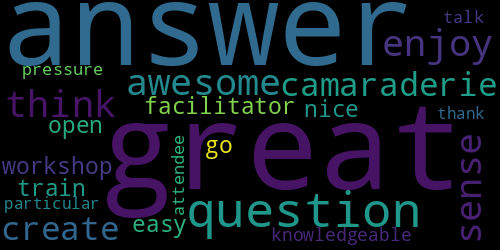

In [113]:
# EDA Initial word cloud 
from wordcloud import WordCloud
words = " ".join(fc_df["fc_pp"].tolist())
wordcloud = WordCloud(width=500, height=250, random_state=591)
wc = wordcloud.generate(words).to_image()
wc

In [114]:
from textblob import TextBlob
fc_df['polarity'] = fc_df['fc_pp'].apply(lambda x: TextBlob(x).polarity)
fc_df['subjective'] = fc_df['fc_pp'].apply(lambda x: TextBlob(x).subjectivity)

/var/folders/lx/k5799j011wz6q8hpjbh635sc0000gn/T/ipykernel_5637/3399257437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['polarity'] = fc_df['fc_pp'].apply(lambda x: TextBlob(x).polarity)
/var/folders/lx/k5799j011wz6q8hpjbh635sc0000gn/T/ipykernel_5637/3399257437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['subjective'] = fc_df['fc_pp'].apply(lambda x: TextBlob(x).subjectivity)


In [115]:
fc_df

,facilitator_Comments,fc_pp,polarity,subjective
1,Awesome!,awesome,1.000000,1.000000
3,can't think of anything right now,think,0.000000,0.000000
4,I enjoyed the sense of camaraderie that was cr...,enjoy sense camaraderie create workshop,0.400000,0.500000
5,Everyone is well trained,train,0.000000,0.000000
6,"Nice, open and very easy going!",nice open easy go,0.344444,0.777778
9,Facilitators were very knowledgeable and great...,facilitator knowledgeable great answer question,0.800000,0.750000
11,"They were great, they did not pressure the att...",great pressure attendee talk answer particular...,0.483333,0.541667
12,Thank you.,thank,0.000000,0.000000
